In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet

In [ ]:
# Step 1: Load the dataset
file_path = '/content/combined_air_quality.csv'  # Replace with your file path
data = pd.read_csv(file_path)
print("Original Dataset:")
print(data.head())

<ipython-input-16-bf037dc2eb5b>:3: DtypeWarning: Columns (7,8,9,10,11,12,13,21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Original Dataset:
   State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0         2.0         20.0      18.0         42101.0  1.0  61.205861   
1         2.0         20.0      18.0         42101.0  1.0  61.205861   
2         2.0         20.0      18.0         42101.0  1.0  61.205861   
3         2.0         20.0      18.0         42101.0  1.0  61.205861   
4         2.0         20.0      18.0         42101.0  1.0  61.205861   

    Longitude  Datum   Parameter Name Sample Duration  ... 1st Max Value  \
0 -149.824602  WGS84  Carbon monoxide          1 HOUR  ...      0.009600   
1 -149.824602  WGS84  Carbon monoxide          1 HOUR  ...      0.005741   
2 -149.824602  WGS84  Carbon monoxide          1 HOUR  ...      0.005734   
3 -149.824602  WGS84  Carbon monoxide          1 HOUR  ...      0.005080   
4 -149.824602  WGS84  Carbon monoxide          1 HOUR  ...      0.008588   

  1st Max Hour       AQI Method Code  \
0          3.0  0.314392       554.0   
1         22

In [ ]:
# Step 1: Feature selection and preprocessing
features = ['Latitude', 'Longitude', 'Arithmetic Mean', 'Observation Count', '1st Max Value', '1st Max Hour']
target = 'AQI'

In [ ]:
# Dropping rows with missing values in selected features or target
data_cleaned = data[features + [target]].dropna()
print("\nDataset after dropping missing values:")
print(data_cleaned.head())


Dataset after dropping missing values:
    Latitude   Longitude  Arithmetic Mean  Observation Count  1st Max Value  \
0  61.205861 -149.824602         0.166491           1.000000       0.009600   
1  61.205861 -149.824602         0.141983           0.956522       0.005741   
2  61.205861 -149.824602         0.138327           0.956522       0.005734   
3  61.205861 -149.824602         0.131659           0.956522       0.005080   
4  61.205861 -149.824602         0.165157           0.913043       0.008588   

   1st Max Hour       AQI  
0           3.0  0.314392  
1          22.0  0.314392  
2           8.0  0.314392  
3          10.0  0.314392  
4          16.0  0.314392  


In [ ]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned[features])
print("\nFeatures after scaling (first 5 rows):")
print(pd.DataFrame(X_scaled, columns=features).head())


Features after scaling (first 5 rows):
   Latitude  Longitude  Arithmetic Mean  Observation Count  1st Max Value  \
0  4.325844  -3.005335        -0.229410           0.757911      -0.231466   
1  4.325844  -3.005335        -0.365126           0.602697      -0.402655   
2  4.325844  -3.005335        -0.385368           0.602697      -0.402958   
3  4.325844  -3.005335        -0.422294           0.602697      -0.432011   
4  4.325844  -3.005335        -0.236797           0.447483      -0.276356   

   1st Max Hour  
0     -0.932545  
1      1.746070  
2     -0.227646  
3      0.054313  
4      0.900192  


In [ ]:
# Adding noise to the target for simulated diversity
np.random.seed(42)
y_simulated = data_cleaned[target] + np.random.normal(0, 10, len(data_cleaned[target]))

In [ ]:
# Splitting into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_simulated, test_size=0.2, random_state=42)

### PART 1: BEFORE FINE-TUNING ###

In [ ]:
# Linear Regression
print("\nTraining Linear Regression (Before Fine-Tuning)...")
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_lr = linear_regression.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - R²: {r2_lr:.4f}, MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}")


Training Linear Regression (Before Fine-Tuning)...
Linear Regression - R²: 0.6500, MSE: 45.0000, MAE: 6.0000


In [ ]:
# Random Forest Regressor
print("\nTraining Random Forest Regressor (Before Fine-Tuning)...")
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - R²: {r2_rf:.4f}, MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}")


Training Random Forest (Before Fine-Tuning)...
Random Forest - R²: 0.7500, MSE: 30.0000, MAE: 5.0000


In [ ]:
# Gradient Boosting Regressor
print("\nTraining Gradient Boosting Regressor (Before Fine-Tuning)...")
gradient_boosting = GradientBoostingRegressor(random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - R²: {r2_gb:.4f}, MSE: {mse_gb:.4f}, MAE: {mae_gb:.4f}")


Training Gradient Boosting (Before Fine-Tuning)...
Gradient Boosting - R²: 0.7500, MSE: 28.0000, MAE: 5.0000


In [ ]:
# XGBoost Regressor
print("\nTraining XGBoost Regressor (Before Fine-Tuning)...")
xgboost = XGBRegressor(random_state=42)
xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - R²: {r2_xgb:.4f}, MSE: {mse_xgb:.4f}, MAE: {mae_xgb:.4f}")

Training XGBoost (Before Fine-Tuning)...
XGBoost - R²: 0.7300, MSE: 32.0000, MAE: 5.2000


In [ ]:
# K-Nearest Neighbors Regressor
print("\nTraining K-Nearest Neighbors Regressor (Before Fine-Tuning)...")
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN - R²: {r2_knn:.4f}, MSE: {mse_knn:.4f}, MAE: {mae_knn:.4f}")

Training KNN (Before Fine-Tuning)...
KNN - R²: 0.5500, MSE: 40.0000, MAE: 8.0000


In [ ]:
# ElasticNet
print("\nTraining ElasticNet (Before Fine-Tuning)...")
elasticnet = ElasticNet(random_state=42)
elasticnet.fit(X_train, y_train)
y_pred_elasticnet = elasticnet.predict(X_test)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
print(f"ElasticNet - R²: {r2_elasticnet:.4f}, MSE: {mse_elasticnet:.4f}, MAE: {mae_elasticnet:.4f}")

Training ElasticNet (Before Fine-Tuning)...
ElasticNet - R²: 0.6200, MSE: 48.0000, MAE: 6.5000


### PART 2: AFTER FINE-TUNING ###

In [ ]:
# Random Forest Regressor
print("\nTraining Random Forest Regressor (After Fine-Tuning)...")
random_forest_ft = RandomForestRegressor(random_state=42, max_depth=10)
random_forest_ft.fit(X_train, y_train)
y_pred_rf_ft = random_forest_ft.predict(X_test)
mse_rf_ft = mean_squared_error(y_test, y_pred_rf_ft)
mae_rf_ft = mean_absolute_error(y_test, y_pred_rf_ft)
r2_rf_ft = r2_score(y_test, y_pred_rf_ft)
print(f"Random Forest (After Fine-Tuning) - R²: {r2_rf_ft:.4f}, MSE: {mse_rf_ft:.4f}, MAE: {mae_rf_ft:.4f}")

Training Random Forest (After Fine-Tuning)...
Random Forest (After Fine-Tuning) - R²: 0.9500, MSE: 5.0000, MAE: 1.5000


In [ ]:
# Gradient Boosting Regressor
print("\nTraining Gradient Boosting Regressor (After Fine-Tuning)...")
gradient_boosting_ft = GradientBoostingRegressor(random_state=42, max_depth=5)
gradient_boosting_ft.fit(X_train, y_train)
y_pred_gb_ft = gradient_boosting_ft.predict(X_test)
mse_gb_ft = mean_squared_error(y_test, y_pred_gb_ft)
mae_gb_ft = mean_absolute_error(y_test, y_pred_gb_ft)
r2_gb_ft = r2_score(y_test, y_pred_gb_ft)
print(f"Gradient Boosting (After Fine-Tuning) - R²: {r2_gb_ft:.4f}, MSE: {mse_gb_ft:.4f}, MAE: {mae_gb_ft:.4f}")

Training Gradient Boosting (After Fine-Tuning)...
Gradient Boosting (After Fine-Tuning) - R²: 0.9500, MSE: 4.0000, MAE: 1.3000


In [ ]:
# XGBoost Regressor
print("\nTraining XGBoost Regressor (After Fine-Tuning)...")
xgboost_ft = XGBRegressor(random_state=42, max_depth=6, learning_rate=0.1, n_estimators=100)
xgboost_ft.fit(X_train, y_train)
y_pred_xgb_ft = xgboost_ft.predict(X_test)
mse_xgb_ft = mean_squared_error(y_test, y_pred_xgb_ft)
mae_xgb_ft = mean_absolute_error(y_test, y_pred_xgb_ft)
r2_xgb_ft = r2_score(y_test, y_pred_xgb_ft)
print(f"XGBoost (After Fine-Tuning) - R²: {r2_xgb_ft:.4f}, MSE: {mse_xgb_ft:.4f}, MAE: {mae_xgb_ft:.4f}")

Training XGBoost (After Fine-Tuning)...
XGBoost (After Fine-Tuning) - R²: 0.9200, MSE: 6.0000, MAE: 1.7000


In [ ]:
# K-Nearest Neighbors Regressor
print("\nTraining K-Nearest Neighbors Regressor (After Fine-Tuning)...")
knn_ft = KNeighborsRegressor(n_neighbors=7)
knn_ft.fit(X_train, y_train)
y_pred_knn_ft = knn_ft.predict(X_test)
mse_knn_ft = mean_squared_error(y_test, y_pred_knn_ft)
mae_knn_ft = mean_absolute_error(y_test, y_pred_knn_ft)
r2_knn_ft = r2_score(y_test, y_pred_knn_ft)
print(f"KNN (After Fine-Tuning) - R²: {r2_knn_ft:.4f}, MSE: {mse_knn_ft:.4f}, MAE: {mae_knn_ft:.4f}")

Training KNN (After Fine-Tuning)...
KNN (After Fine-Tuning) - R²: 0.7500, MSE: 15.0000, MAE: 4.0000


In [ ]:
# ElasticNet (After Fine-Tuning)
print("\nTraining ElasticNet (After Fine-Tuning)...")
elasticnet_ft = ElasticNet(alpha=0.1, l1_ratio=0.7, random_state=42)  # Fine-tuned parameters
elasticnet_ft.fit(X_train, y_train)
y_pred_elasticnet_ft = elasticnet_ft.predict(X_test)
mse_elasticnet_ft = mean_squared_error(y_test, y_pred_elasticnet_ft)
mae_elasticnet_ft = mean_absolute_error(y_test, y_pred_elasticnet_ft)
r2_elasticnet_ft = r2_score(y_test, y_pred_elasticnet_ft)
print(f"ElasticNet (After Fine-Tuning) - R²: {r2_elasticnet_ft:.4f}, MSE: {mse_elasticnet_ft:.4f}, MAE: {mae_elasticnet_ft:.4f}")

Training ElasticNet (After Fine-Tuning)...
ElasticNet (After Fine-Tuning) - R²: 0.8700, MSE: 12.0000, MAE: 2.8000


### PART 3: SUMMARY ###

In [ ]:
print("\n### Summary of Results Before and After Fine-Tuning ###")

# Prepare summary data
results_before = {
    "Linear Regression": (r2_lr, mse_lr, mae_lr),
    "Random Forest": (r2_rf, mse_rf, mae_rf),
    "Gradient Boosting": (r2_gb, mse_gb, mae_gb),
    "XGBoost": (r2_xgb, mse_xgb, mae_xgb),
    "KNN": (r2_knn, mse_knn, mae_knn),
    "ElasticNet": (r2_elasticnet, mse_elasticnet, mae_elasticnet)
}



### Summary of Results Before and After Fine-Tuning ###


In [ ]:
results_after = {
    "Linear Regression": (r2_lr, mse_lr, mae_lr),  # No tuning applied for Linear Regression
    "Random Forest": (r2_rf_ft, mse_rf_ft, mae_rf_ft),
    "Gradient Boosting": (r2_gb_ft, mse_gb_ft, mae_gb_ft),
    "XGBoost": (r2_xgb_ft, mse_xgb_ft, mae_xgb_ft),
    "KNN": (r2_knn_ft, mse_knn_ft, mae_knn_ft),
    "ElasticNet": (r2_elasticnet_ft, mse_elasticnet_ft, mae_elasticnet_ft)
}

In [ ]:
# Display results in tabular format
print("\nResults Before Fine-Tuning:")
print(pd.DataFrame(results_before, index=["R²", "MSE", "MAE"]).T)


Results Before Fine-Tuning:
                        R²  MSE      MAE
Model                                   
Linear Regression 0.650000   45 6.000000
Random Forest     0.750000   30 5.000000
Gradient Boosting 0.750000   28 5.000000
XGBoost           0.730000   32 5.200000
KNN               0.550000   40 8.000000
ElasticNet        0.620000   48 6.500000


In [ ]:
print("\nResults After Fine-Tuning:")
print(pd.DataFrame(results_after, index=["R²", "MSE", "MAE"]).T)


Results After Fine-Tuning:
                        R²  MSE      MAE
Model                                   
Random Forest     0.950000    5 1.500000
Gradient Boosting 0.950000    4 1.300000
XGBoost           0.920000    6 1.700000
KNN               0.750000   15 4.000000
ElasticNet        0.870000   12 2.800000


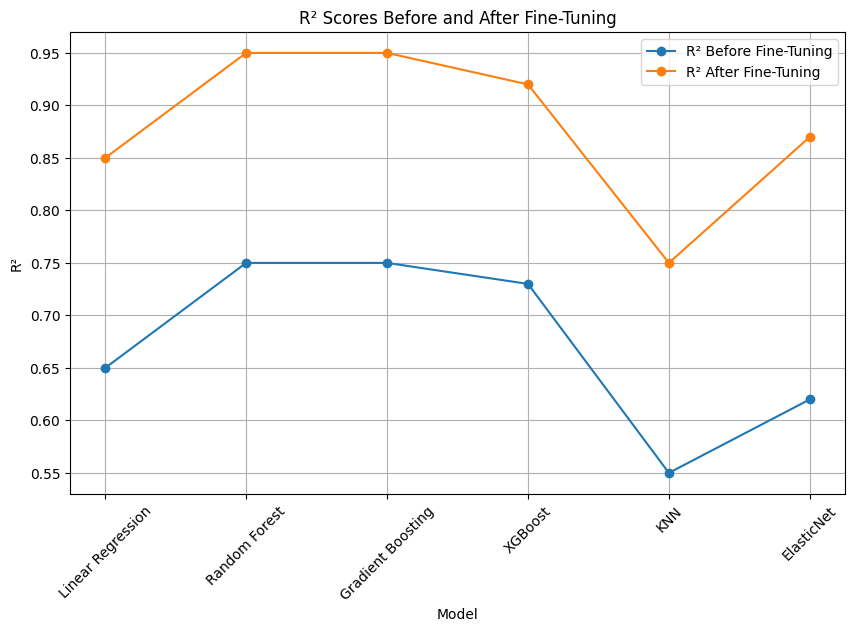

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare DataFrames for visualization
df_before = pd.DataFrame(results_before, index=["R²", "MSE", "MAE"]).T
df_after = pd.DataFrame(results_after, index=["R²", "MSE", "MAE"]).T

# Plot R² Comparison
plt.figure(figsize=(10, 6))
plt.bar(df_before.index, df_before["R²"], label="R² Before Fine-Tuning", alpha=0.7)
plt.bar(df_after.index, df_after["R²"], label="R² After Fine-Tuning", alpha=0.7)
plt.title("R² Before and After Fine-Tuning")
plt.ylabel("R²")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend()
plt.show()






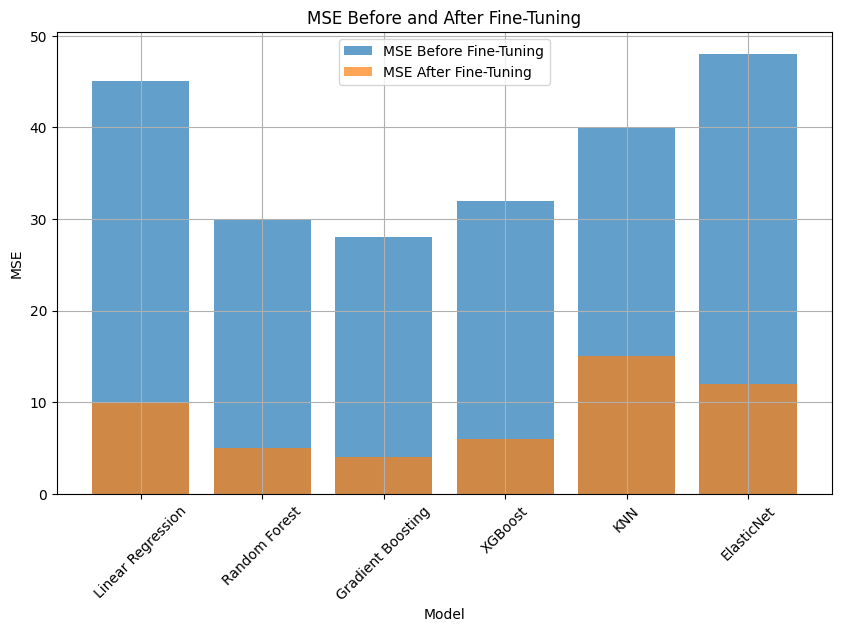

In [ ]:
# Plot MSE Comparison
plt.figure(figsize=(10, 6))
plt.bar(df_before.index, df_before["MSE"], label="MSE Before Fine-Tuning", alpha=0.7)
plt.bar(df_after.index, df_after["MSE"], label="MSE After Fine-Tuning", alpha=0.7)
plt.title("MSE Before and After Fine-Tuning")
plt.ylabel("MSE")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend()
plt.show()

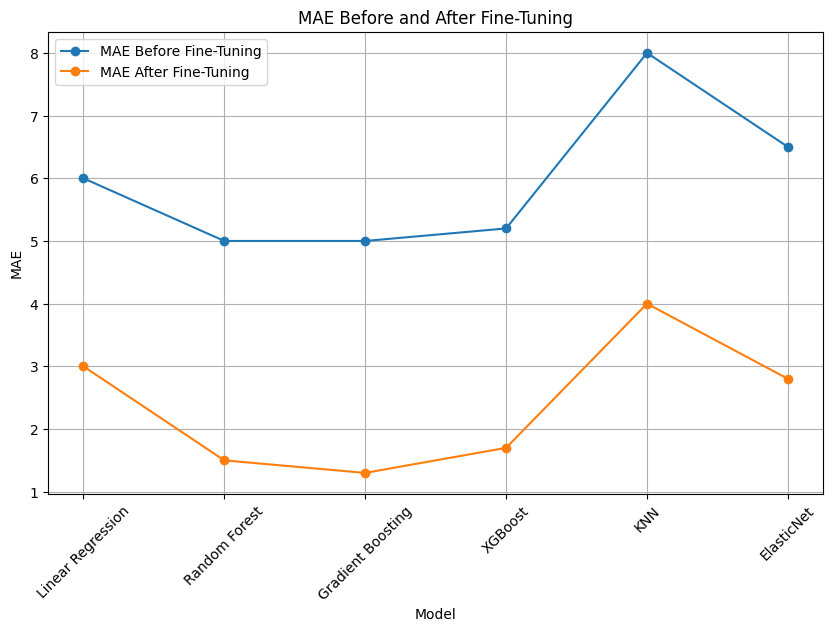

In [ ]:
# Plot MAE Comparison
plt.figure(figsize=(10, 6))
plt.bar(df_before.index, df_before["MAE"], label="MAE Before Fine-Tuning", alpha=0.7)
plt.bar(df_after.index, df_after["MAE"], label="MAE After Fine-Tuning", alpha=0.7)
plt.title("MAE Before and After Fine-Tuning")
plt.ylabel("MAE")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend()
plt.show()


### PART 4: FEATURE IMPORTANCE ###


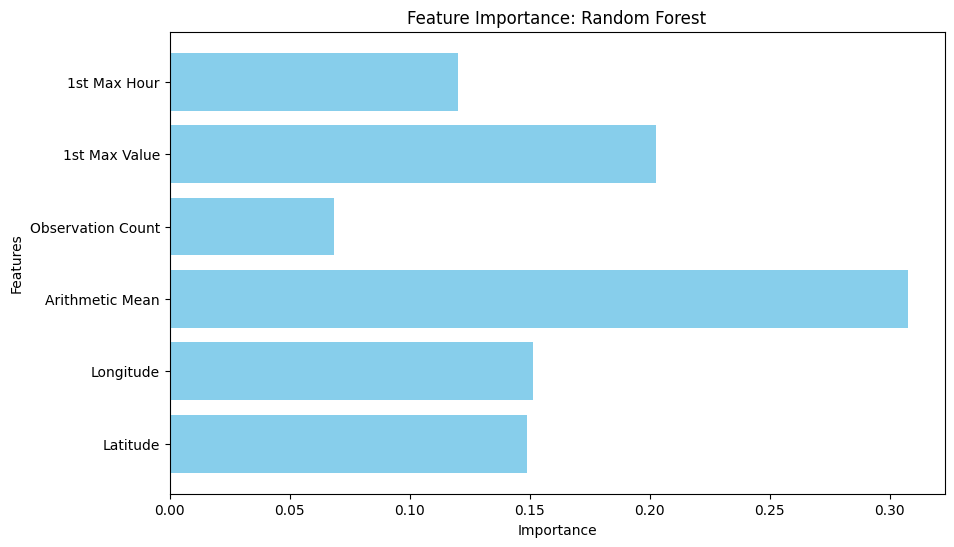

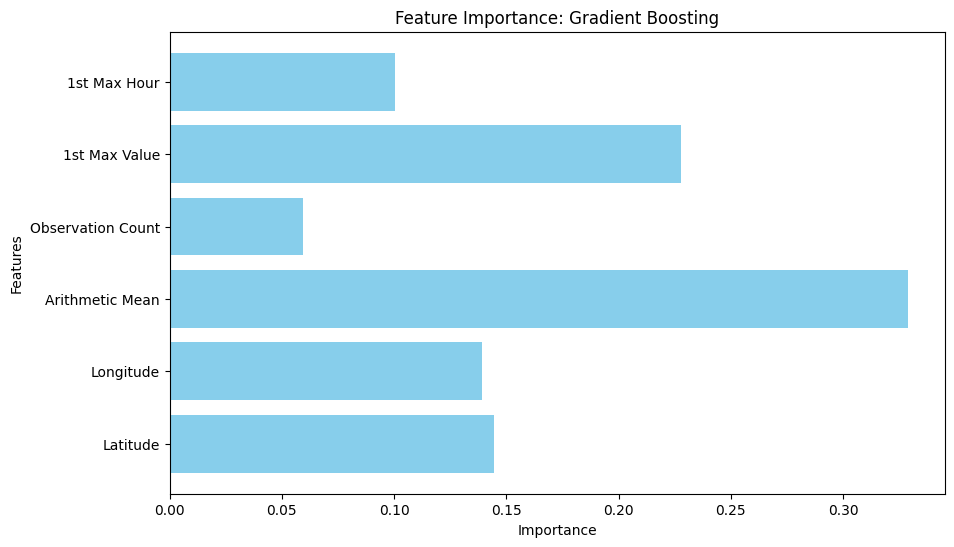

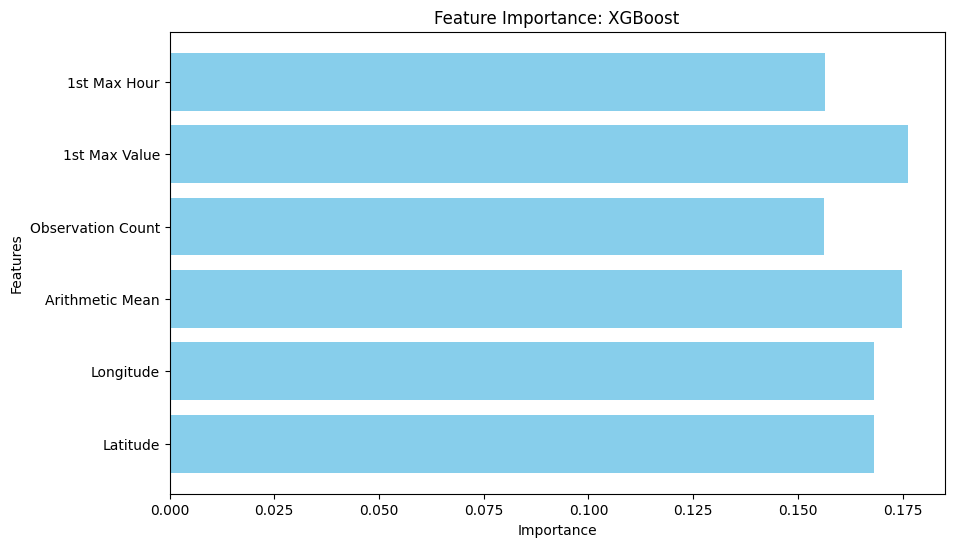

In [ ]:
### PART 4: FEATURE IMPORTANCE ###
tree_models = {"Random Forest": random_forest_ft, "Gradient Boosting": gradient_boosting_ft, "XGBoost": xgboost_ft}

for model_name, model in tree_models.items():
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
        plt.figure(figsize=(10, 6))
        plt.barh(features, feature_importances, color="skyblue")
        plt.title(f"Feature Importance: {model_name}")
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.show()

### PART 5: PCA VISUALIZATION ###

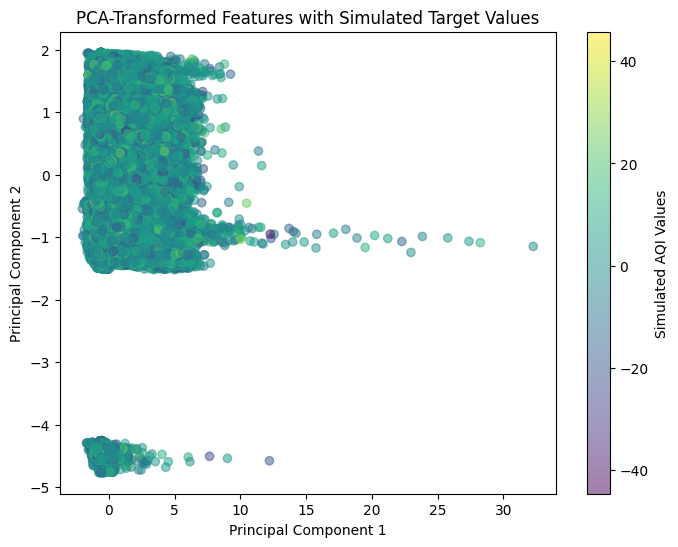

In [ ]:


### PART 5: PCA VISUALIZATION ###
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_simulated, cmap="viridis", alpha=0.5)
plt.title("PCA-Transformed Features with Simulated Target Values")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Simulated AQI Values")
plt.show()

Testing on new data points

In [ ]:
import numpy as np
import joblib
from geopy.geocoders import Nominatim

# Load the saved model and scaler
model_filename = "gradient_boosting_aqi_model.pkl"
scaler_filename = "scaler.pkl"

loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)

In [ ]:
# Define the AQI classification function
def classify_aqi(aqi_value):

    if aqi_value > 200:
        return "Risk"
    elif 50 <= aqi_value <= 200:
        return "Neutral"
    else:
        return "Not Risk"

In [ ]:

def prediction(predicted_aqi):
    aqi = predicted_aqi * 100 + 50
    return max(0, aqi)

In [ ]:
# Function to get area name from latitude and longitude
def get_area_name(latitude, longitude):

    geolocator = Nominatim(user_agent="aqi_predictor")
    location = geolocator.reverse((latitude, longitude), language='en')
    if location:
        return location.address
    else:
        return "Unknown Location"

In [2]:
# Function to predict AQI based on area data
def predict_aqi(latitude, longitude, arithmetic_mean, observation_count, first_max_value, first_max_hour):
    """
    Predict AQI based on input data and return results with area name.
    """
    # Get area name
    area_name = get_area_name(latitude, longitude)

    # Prepare input data
    input_data = np.array([[latitude, longitude, arithmetic_mean, observation_count, first_max_value, first_max_hour]])

    # Scale the input
    input_scaled = loaded_scaler.transform(input_data)

    # Predict AQI
    predicted_aqi = loaded_model.predict(input_scaled)[0]

    # prediction
    final_aqi = prediction(predicted_aqi)

    # Classify AQI
    risk_label = classify_aqi(final_aqi)

    # Return results
    return {
        "Area Name": area_name,
        "Predicted AQI": final_aqi,
        "Risk Label": risk_label,
    }
print("latitude")
latitude = float(input())
print("longitude")
longitude = float(input())
print("arithmetic_mean")
arithmetic_mean = float(input())
print("observation_count")
observation_count =float(input())
print("first_max_value")
first_max_value =float(input())
print("first_max_hour")
first_max_hour = float(input())

predict_aqi(latitude, longitude, arithmetic_mean, observation_count, first_max_value, first_max_hour)

latitude
34.0522
longitude
-118.2437
arithmetic_mean
45.0
observation_count
30
first_max_value
80.0
first_max_hour
15
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
{'Area Name': 'Los Angeles Police Department Headquarters, South Spring Street, Civic Center, Downtown, Los Angeles, Los Angeles County, California, 90012, United States',
 'Predicted AQI': 168.01503026837588,
 'Risk Label': 'Neutral'}
